# <font style="color:black">Lecture 1: Homework Problem</font>

In this first homework set, I want you to make sure that you can use GitHub, MS Code, and OpenCV.
You should (already to be able to read this document), clone the Github classroom assignment and edit it in VS Code.  In this python notebook, do the following:

* Load an (Grayscale) image  (‘Data/Apollo_11_Launch.jpg’)
* View image
* Crop image
* Edit brightness of image
* Rotate image
* Save modified image

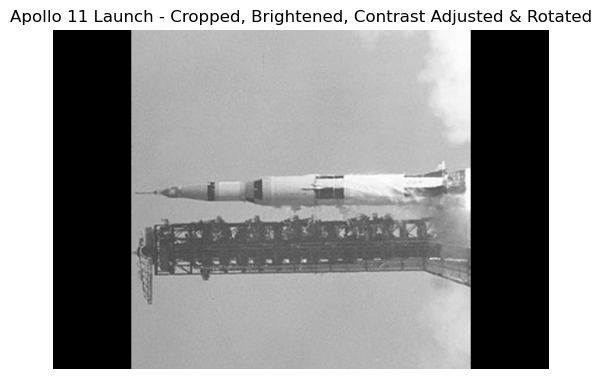

In [4]:
import cv2
from matplotlib import pyplot as plt

# Step 1: Load the image
image_path = "data/Apollo_11_Launch.jpg"
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Could not load the image. Check the path!")

# Convert BGR → RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2: Crop the image (center portion)
h, w, _ = img_rgb.shape
cropped = img_rgb[h//7:h*3//4, w//4:w*3//4]

# Step 3: Adjust brightness & contrast
# alpha = contrast factor (>1 higher contrast, <1 lower contrast)
# beta  = brightness adjustment (positive = brighter, negative = darker)
alpha = 0.8   # increase contrast slightly
beta = 50     # increase brightness slightly
adjusted = cv2.convertScaleAbs(cropped, alpha=alpha, beta=beta)

# Step 4: Rotate the final image (90° clockwise)
(h2, w2) = adjusted.shape[:2]
center = (w2 // 2, h2 // 2)
matrix = cv2.getRotationMatrix2D(center, 90, 1.0)
final_img = cv2.warpAffine(adjusted, matrix, (w2, h2))

# Step 5: Show the final processed image
plt.imshow(final_img)
plt.title("Apollo 11 Launch - Cropped, Brightened, Contrast Adjusted & Rotated")
plt.axis("off")
plt.show()


In [5]:
import cv2

# Save final processed image to the repo folder (e.g., "data" folder)
output_path = "data/Apollo_11_Launch_processed.jpg"
# Convert RGB back to BGR for OpenCV saving
cv2.imwrite(output_path, cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR))

print(f"Saved processed image at {output_path}")


Saved processed image at data/Apollo_11_Launch_processed.jpg
